<h1>
    <br style ="color:#EA7600"> UCL </br> 
    </p>
</h1>

<div>

  <h4>
      <p style="font-size:18pt">COMP0198 Machine Learning with Applications in Finance</p>
      <p style="font-size:18pt">Week 4</p>
  </h4>

</div>

# Table of Contents
* [1. Decision Trees](#1.-Decision-Trees)
    * [1.1 Training decision tree](#1.1-Training-decision-tree)
    * [1.2 Visualizing decision tree](#1.2-Visualizing-decision-tree)
    * [1.3 Predicting classes and class probabilities](#1.3-Predicting-classes-and-class-probabilities)
    * [1.4 ROC curve](#1.4-ROC-curve)
        * [1.4.1 AUC](#1.4.1-AUC)
    * [1.5 CART](#1.4-CART)
    * [1.6 Regularization](#1.5-Regularization)
    * [1.7 Regression](#1.6-Regression)
* [2. Ensemble Learning](#2.-Ensemble-Learning)
    * [2.1 Voting classifiers](#2.1-Voting-classifiers)
    * [2.2 Bagging and Pasting](#2.2-Bagging-and-Pasting)
    * [2.3 Out-of-Bag Evaluation](#2.3-Out-of-Bag-Evaluation)
    * [2.4 Random Forests](#2.4-Random-Forests)
* [3. Boosting](#3.-Boosting)
    * [3.1 AdaBoost](#3.1-AdaBoost)
    * [3.2 Gradient Boosting](#3.2-Gradient-Boosting)
* [4. Stacking](#4.-Stacking)

# Setup

This project requires Python 3.7 or above:

In [26]:
import sys

assert sys.version_info >= (3, 7)

Let's import the libraries we will need for this week's lab and verify that we have the correct versions:

In [27]:
# scipy
import scipy
print("scipy: %s"  % scipy.__version__)
# numpy
import numpy
print("numpy: %s"  % numpy.__version__)
# matplotlib
import matplotlib
print( "matplotlib: %s"  % matplotlib.__version__)
# pandas
import pandas
print( "pandas: %s"  % pandas.__version__)
# statsmodels
import statsmodels
print( "statsmodels: %s"  % statsmodels.__version__)
# scikit-learn
import sklearn
print( "sklearn: %s"  % sklearn.__version__)

scipy: 1.11.2
numpy: 1.24.3
matplotlib: 3.8.0
pandas: 2.1.1
statsmodels: 0.14.0
sklearn: 1.3.0


If we get an error of type: `ModuleNotFoundError`, we can install the missing library by running:

- !pip install nameOfMissingLibrary

Let's verify that we are using the version requires of Scikit-Learn ≥ 1.0.1:

In [28]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Let's define the default font sizes to make the figures prettier:

In [29]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/decision_trees` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [30]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 1. Decision Trees

Simple trees are a fundemental component of Random Forest calssifires, which are among the most powerful machine learning algorithms around. 

First, lets look at how to train, vizualise and make predictions with a Decision Tree in **`scikit-learn`**. 

Then, we'll discuss how to regularize trees and use them for regression tasks. 



## Decision Tree

|Algorithm Taxonomy |
|:---|
|Discriminative  |
|Non-Parametric  |
|Non-Linear  |
|Deterministic |


### A visual introduction to machine learning 

A very intuitive vizualisation of a **decision tree** algorithm can be found [here](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/).

Let's walk through to get an understanding of how this is algorithm works before looking at the recipe below.

## 1.1 Training decision tree

### Random State
Since the training algorithm used by **`scikit-learn`** is stochastic you may get very different models even on the **same** training data (unless you set the **`random_state`** hyperparameter). In the following example, we are using the [iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [31]:
from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

## 1.2 Visualizing decision tree

We can visualize the trained Decision Tree and export the tree in Graphviz format using the export_graphviz exporter. Before we use the exporter, we need to install the [GraphViz drawing software]((https://graphviz.gitlab.io/download/)) and its python package. If you use the conda package manager, the graphviz binaries and the python package can be installed with:

```python 
conda install -c anaconda graphviz
```

Alternatively the binaries for graphviz can be downloaded from the [graphviz project homepage](https://graphviz.org/download/), and the Python wrapper installed from pypi with:

```python
pip install graphviz
```

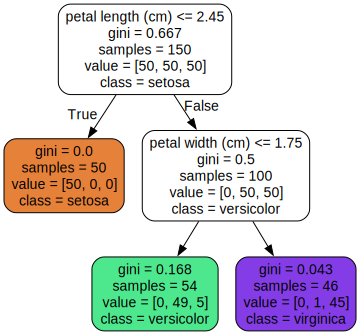

In [32]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_clf, 
                           out_file=None,
                           feature_names=iris.feature_names[2:],
                           class_names=iris.target_names,
                           rounded=True,
                           filled=True)

graph = graphviz.Source(dot_data)  
graph

The elements of the Decision Tree are:
- **Root node**: The root node is the first node in the tree. It is the starting point for the decision tree. It is the first node that is used to split the data.
- **Decision node**: A decision node is a node that has two or more branches. It is used to split the data based on a certain condition.
- **Leaf/terminal node**: A leaf or terminal node is a node that does not have any children. It is used to predict the outcome.
- **Pruning**: Pruning is the process of removing a node from the tree. It is used to reduce the complexity of the model.

Another option to visualize decision trees is to use the [dtreeviz library](https://github.com/parrt/dtreeviz):

```python
!pip install dtreeviz
```

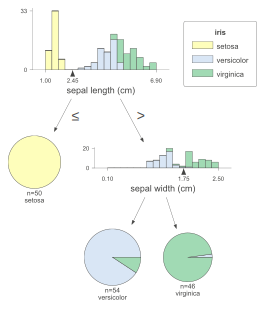

In [33]:
import dtreeviz

viz_model = dtreeviz.model(tree_clf, 
               X_train=X, #X
               y_train=y, #Y
               target_name='iris', #Name of Y variable
              feature_names=list(iris.feature_names), #Name of variables in X
               class_names=iris.target_names  # need class_names for classifier
              )                
viz_model.view()

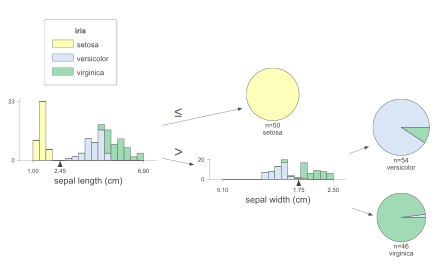

In [34]:
viz_model.view(orientation="LR")

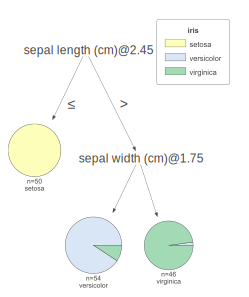

In [35]:
viz_model.view(fancy=False)

### Decision Tree's decision boundaries
We can plot the decision boundaries of the model. The thick vertical line represents the decision boundary of the root node (depth 0): petal length = 2.45 cm. Since the left area is pure (only Iris-Setosa), it cannot be split any further. However, the right area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line). Since max_depth was set to 2, the Decision Tree stops right there. However, if you set max_depth to 3, then the two depth-2 nodes would each add another decision boundary (represented by the dotted lines).

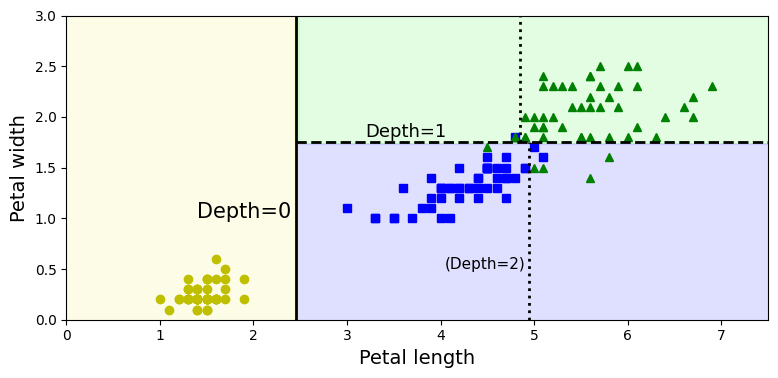

In [36]:
from matplotlib.colors import ListedColormap
import numpy as np 
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

<div class="image">
     <img src="./figures/decision_trees/decision_tree_decision_boundaries_plot.png" width="100%"  align="right">
</div>

Another option to look at the boundaries is to use the `dtreeviz` library:

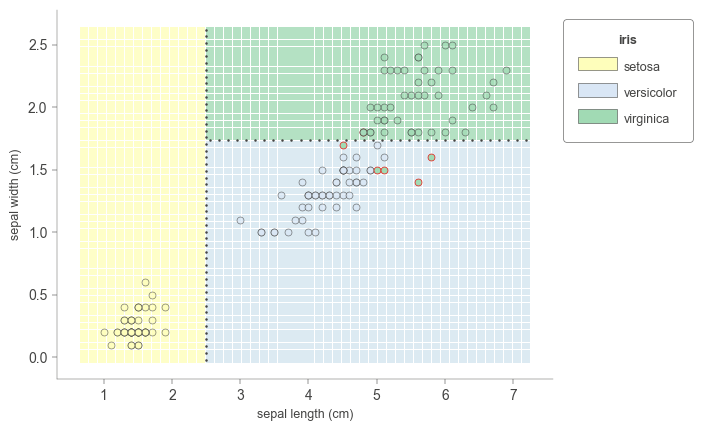

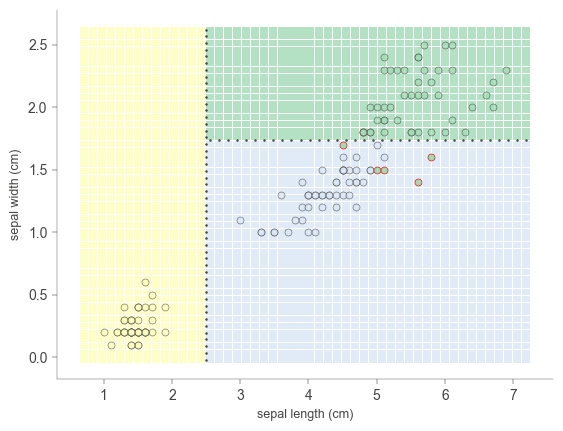

In [37]:
import matplotlib.pyplot as plt
from dtreeviz import decision_boundaries

decision_boundaries(tree_clf, X, y,
                    target_name='iris',
                     class_names=iris.target_names,
       feature_names=list(iris.feature_names))


decision_boundaries(tree_clf, X, y,
       # show classification regions not probabilities
       show=['instances', 'boundaries', 'misclassified'],
       target_name='iris',
       feature_names=list(iris.feature_names))


plt.show()


<div class="alert alert-info">
<b>HINT:</b>  White Box vs Black box

<p>As you can see Decision Trees are fairly intuitive and their decisions are easy to interpret. Such models are often called white box models. In contrast, as we will see, Random Forests or neural networks are generally considered black box models. They make great predictions, and you can easily check the calculations that they performed to make these predictions; nevertheless, it is usually hard to explain in simple terms why the predictions were made. For example, if a neural network says that a particular person appears on a picture, it is hard to know what actually contributed to this prediction: did the model recognize that person’s eyes? Her mouth? Her nose? Her shoes? Or even the couch that she was sitting on? Conversely, Decision Trees provide nice and simple classification rules that can even be applied manually if need be (e.g., for flower classification). </p>

</div>


## 1.3 Predicting classes and class probabilities

A decision tree can also estimate the probability that an instance belongs to a particular class $k$:  first it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class $k$ in this node.


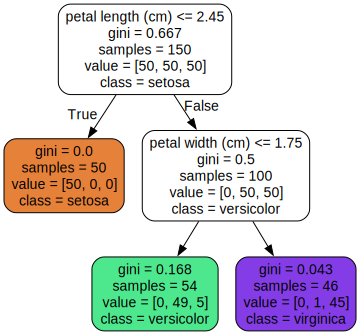

In [38]:
graph

For example, suppose you have found a flower whose petals are 5cm long (X0) and 1.5 cm wide (X1), the corresponding leaf node is the depth-2 left node. The output of the class probabilities are: 0% for Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54), and 9.3% for Iris-Virginica (5/54).

In [39]:
import pandas as pd

data_predict = [[5, 1.5]]
x_test = pd.DataFrame(data_predict, columns=['petal length (cm)', 'petal width (cm)'])

# # print(tree_clf.predict_proba([[5, 1.5]]))
# print(tree_clf.predict_proba(x_test.iloc[0]))

tree_clf.predict_proba(data_predict) # Iris-Versicolor (class 1)

array([[0.        , 0.90740741, 0.09259259]])

For interpretation purposes, we may want to understand how the model arrived at its prediction by visualizing the Decision Tree path to predict a result:

c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\dtreeviz\models\shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\dtreeviz\trees.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


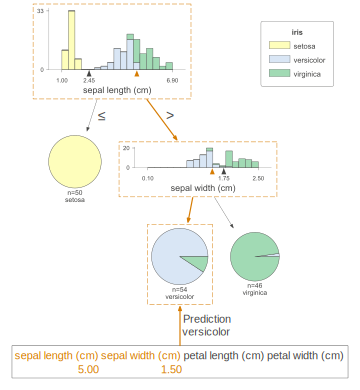

In [40]:
viz_model.view(x=x_test.iloc[0])

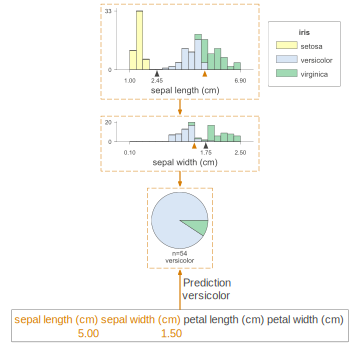

In [41]:
viz_model.view(x=x_test.iloc[0], show_just_path=True)

## 1.4 ROC curve

The ROC curve (receiver operating characteristic curve) is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. 

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate (TPR) which indicates the proportion of positive cases that are correctly identified as such (also known as sensitivity, recall or probability of detection in some fields).
- False Positive Rate (FPR) which indicates the proportion of negative cases that are incorrectly identified as positive (also known as the probability of false alarm).

**True Positive Rate (TPR)** is a synonym for recall and is therefore defined as follows:

$$TPR = \frac{TP}{TP + FN}$$

**False Positive Rate (FPR)** is defined as follows:

$$FPR = \frac{FP}{FP + TN}$$

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve:


<img src="./figures/ROCCurve.svg" width="50%">

To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.

### 1.4.1 AUC

The **Area Under the Curve (AUC)** is a performance metric for binary classification problems. The AUC represents a model's ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

<img src="./figures/AUC.svg" width="50%">

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

<img src="./figures/AUCPredictionsRanked.svg" width="50%">

**AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.**

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is desirable for the following two reasons:

- AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
- AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

However, both these reasons come with caveats, which may limit the usefulness of AUC in certain use cases:

- Scale invariance is not always desirable. For example, sometimes we really do need well calibrated probability outputs, and AUC won’t tell us about that.

- Classification-threshold invariance is not always desirable. In cases where there are wide disparities in the cost of false negatives vs. false positives, it may be critical to minimize one type of classification error. For example, when doing email spam detection, you likely want to prioritize minimizing false positives (even if that results in a significant increase of false negatives). AUC isn't a useful metric for this type of optimization.


Let's see how to compute the AUC using `sklearn`:

The AUC scores are:  {0: 1.0, 1: 0.9878048780487805, 2: 0.9874338624338626}


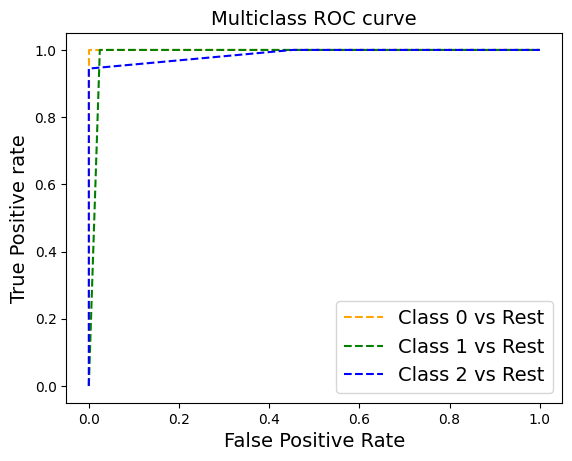

In [42]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target


# generate 3 class dataset for classification
# X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

pred = tree_clf.predict(X_test)
pred_prob = tree_clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc_scores = {}

n_class = len(set(y_test))

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    auc_scores[i] = auc(fpr[i], tpr[i])

print("The AUC scores are: ", auc_scores)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

Using the Iris dataset and a Decision Tree classifier, the ROC curve above shows that the classifier is very good at distinguishing between the three classes. The AUC is equal to:
- 1 for class 0, which is perfect.
- 0.99 for class 1, which is very good.
- 0.98 for class 2, which is also very good.

A perfect classifier would have a True Positive Rate equal to 1 while its False Positive Rate is equal to 0, hence the ROC curve would start from the bottom-left corner (0,0) and go all the way to the top-right corner (1,1). This is represented by the solid line in the figure above. A purely random classifier would have a ROC curve that lies along the dashed line (represented by the dotted line in the figure above), which means its True Positive Rate is equal to its False Positive Rate.

## 1.5 CART

**`scikit-learn`** uses the Classification And Regression Tree (CART) algorithm to train/learn Decision Trees (also called “growing” trees). 

The idea is really quite simple: the algorithm first splits the training set in two subsets using a single feature $k$ and a threshold $t_k$ (e.g., “petal length ≤ 2.45 cm”). How does it choose $k$ and $t_k$? 

It searches for the pair $(k, t_k)$ that produces the purest subsets (weighted by their size). The cost function that the algorithm tries to minimize is given by:



### Gini index or entropy as cost function?

The Gini index is the most widely used cost function in decision trees. It is also the default cost function used by **`scikit-learn`**. However, when they are trained on small training sets, they are very likely to overfit the data. It is generally preferable to use entropy instead. 

By default, the Gini index measure is used, but you can select the entropy impurity measure instead by setting the **`criterion`** hyperparameter to `"entropy"`. Both cost functions use the probability $p_i$ of an instance belonging to class $i$ to evaluate the impurity of a set of instances:

$$ \text{proportion or } p_i = \frac{count(C_i)}{count(data)} $$

where:
- $C_i$ is the $i^{th}$ class
- $count(C_i)$ is the number of instances of class $C_i$ in the subset
- $count(data)$ is the total number of instances in the subset
- $p_i$ is the proportion of class $C_i$ in the subset

#### Gini index
Gini impurity is the most common impurity measure used in Decision Trees. It is defined as the sum of the probability of misclassification for each class, weighted by the probability of each class:

$$ Gini = \sum_{i=1}^{n} (proportion_i \times (1.0 - proportion_i)) = 1 - \sum_{i=1}^{n} (proportion_i)^2 $$

where:
- $n$ is the number of classes
- $Gini$ is the Gini impurity of the subset
- $proportion_i$ is the proportion of class $C_i$ in the subset
- $1.0 - proportion_i$ is the proportion of the other classes in the subset
- $Gini$ is the Gini impurity of the subset

The gini index range goes from 0 to 0.5. A gini index of 0 means that all instances in the subset belong to the same class. A gini index of 0.5 means that the subset is perfectly balanced (50% of the instances belong to one class, 50% to the other class). E.g. For example if a node contains five samples, with two of class 1, two of class 2, one of class 3 and none of class 4, meaning:

`X = [[1.5], [1.7], [2.3], [2.7], [2.7]]` and `y = [1, 1, 2, 2, 3]`

, then the Gini index is:

$1 - \frac{2}{5}^2 - \frac{2}{5}^2 - \frac{1}{5}^2 = 0.64$.

##### CART algorithm

The CART algorithm is a recursive algorithm, short for Classification And Regression Trees. Each node is split so that the Gini impurity of the children (more specifically the average of the Gini of the children weighted by their size) is minimized. 

The recursion stops when the **maximum depth**, a hyperparameter, is reached, or when no split can lead to two children purer than their parent. There are other stopping conditions, but they are not used by default. 

For example, if `X = [[1.5], [1.7], [2.3], [2.7], [2.7]]` and `y = [1, 1, 2, 2, 3]` then an optimal split is `feature_0 < 2`, because as computed above the Gini of the **parent is 0.64**, and the Gini of the children after the split is **0.27**:

$G = 2/5 \times G_{left} + 3/5 \times G_{right} = 0.27$.


#### Entropy

Entropy favors splits with small counts (small datasets), but many unique values (many labels). Entropy is defined by the following formula:

$$ Entropy(S) = - \sum_{i=1}^{n} (proportion_i \times log_2(proportion_i)) $$

where:
- $Entropy(S)$ is the entropy of the subset $S$
- $n$ is the number of classes
- $proportion_i$ is the proportion of class $C_i$ in the subset
- $log_2(proportion_i)$ is the logarithm of the proportion of class $C_i$ in the subset

The entropy range goes from 0 (pure) to 1 (impure). The entropy is zero when all instances belong to the same class. In other words, subsets containing instances of only one class are "pure". The entropy is 1 when the subset is perfectly balanced (50% of the instances belong to one class, 50% to the other class).

**So, should you use Gini impurity or entropy?** The truth is, most of the time it does not make a big difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

##### CART cost function for classification

The CART cost function for classification tasks is defined by the following formula:

$$ J(k,t_k) = \frac{m_l}{m}G_{l} + \frac{m_r}{m}G_{r} $$

where:
- $J(k,t_k)$ is the impurity of the subset using feature $k$ and threshold $t_k$
- $G_{l}$ is the impurity of the left subset
- $G_{r}$ is the impurity of the right subset
- $m_l$ is the number of instances in the left subset
- $m_r$ is the number of instances in the right subset
- $m$ is the total number of instances in the subset

Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the **`max_depth`** hyperparameter),  or if it cannot find a split that will reduce impurity. A few other hyperparameters (described in a moment) control additional stopping conditions (min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes).

- max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_split: The minimum number of samples a node must have before it can be split. E.g. if min_samples_split=10, then a node must have at least 10 samples to be split.
- min_samples_leaf: The minimum number of samples a leaf node must have.
- min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. E.g. if min_weight_fraction_leaf=0.1, then a leaf node must have at least 10% of the sum total weight of all the input samples to be a leaf node.

The key to the CART algorithm is finding the optimal feature and threshold such that the Gini impurity is minimized. To do so, we try all possible splits and compute the resulting Gini impurities. Let's implement a Decision Tree classifier using the **`CART`** algorithm:

1. iterate through the sorted feature values as possible thresholds, 
2. keep track of the number of samples per class on the left and on the right 
3. increment/decrement them by 1 after each threshold. From them we can easily compute Gini in constant time.

Indeed if $m$ is the size of the node and $m[k]$ the number of samples of class $k$ in the node, then:

$$
Gini = 1 - \sum_{k=1}^{n} (\frac{m_{k}}{m})^2
$$

and since after seeing the i-th threshold there are i elements on the left and m–i on the right:

$$
Gini_{i}^{left} = 1 - \sum_{k=1}^{n} (\frac{m_{k}^{left}}{i})^2
$$

and

$$
Gini_{i}^{right} = 1 - \sum_{k=1}^{n} (\frac{m_{k}^{right}}{m-i})^2
$$

where $m_{k}^{left}$ is the number of samples of class $k$ on the left and $m_{k}^{right}$ is the number of samples of class $k$ on the right. The resulting Gini is a simple weighted average:

$$
Gini_{i} = \frac{i}{m}Gini_{left} + \frac{m-i}{m}Gini_{right}
$$

where:
- $Gini_{i}$ is the Gini impurity of the node after seeing the i-th threshold
- $Gini_{left}$ is the Gini impurity of the left node
- $Gini_{right}$ is the Gini impurity of the right node
- $i$ is the number of samples/labels on the left
- $m$ is the total number of samples/labels in the node


In [43]:
# Let’s start implementing our Node helper class:

class Node:

    """
    A node in a decision tree. It stores the following information:
    idxs = the indices of the rows in the dataset that are contained in this node
    find_varsplit = the column index of the variable that is used for splitting
    """

    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

Fitting a decision tree to data X and targets y is done via the `fit()` method which calls a recursive method `_grow_tree()`:

In [44]:
class MyDecisionTreeClassifier:

    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def proportions(self, y):

        """
        Returns the proportion of each class/label in the data or
        the probability of each class/label in the data

        """

        total_number_labels = len(y)
        counts_per_label = np.bincount(y)

        return counts_per_label / total_number_labels

    def _gini(self, y):

        """Compute Gini impurity of a non-empty node.
        Gini impurity is defined as Σ p(1-p) over all classes, with p the frequency of a
        class within the node. Since Σ p = 1, this is equivalent to 1 - Σ p^2.
        """
        m = y.size
        
        return 1.0 - sum(proportion**2 for proportion in self.proportions(y))


    def entropy(self, y):
    
        """
        Entropy is a measure of the uncertainty of the samples. 
        E.g. if we have 50% of class 1 and 50% of class 2, then the entropy is 1.
        If we have 90% of class 1 and 10% of class 2, then the entropy is 0.468.
        The entropy is 0 if all the samples belong to the same class.
        """

        # If there is only one class, then the entropy is 0
        n_labels = len(y)
        print("Number of n_labels:", y)
        if n_labels <= 1:
            return 0

        p = self.proportions(labels)

        # Count the number of labels
        n_classes = np.count_nonzero(p)
        print("Number of clases:", n_classes)

        # if we have only one class, then entropy is 0
        if n_classes <= 1:
            return 0

        ent = 0.

        # Compute standard entropy for each class
        for i in p:
            ent -= i * np.math.log(i, n_classes)

        return ent

    def _best_split(self, X, y):
        """Find the best split for a node.
        "Best" means that the average impurity of the two children, weighted by their
        population, is the smallest possible. Additionally it must be less than the
        impurity of the current node.
        To find the best split, we loop through all the features, and consider all the
        midpoints between adjacent training samples as possible thresholds. We compute
        the Gini impurity of the split generated by that particular feature/threshold
        pair, and return the pair with smallest impurity.
        Returns:
            best_idx: Index of the feature for best split, or None if no split is found.
            best_thr: Threshold to use for the split, or None if no split is found.
        """
        # Need at least two elements to split a node.
        m = y.size
        if m <= 1:
            return None, None

        # Count of each class in the current node.
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]

        # Gini of current node.
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None

        # Loop through all features.
        for idx in range(self.n_features_):

            # Sort data along selected feature.
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))

            # We could actually split the node according to each feature/threshold pair
            # and count the resulting population for each class in the children, but
            # instead we compute them in an iterative fashion, making this for loop
            # linear rather than quadratic.
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()

            for i in range(1, m):  # possible split positions
                c = classes[i - 1]

                num_left[c] += 1
                num_right[c] -= 1

                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )

                # The Gini impurity of a split is the weighted average of the Gini
                # impurity of the children.
                gini = (i * gini_left + (m - i) * gini_right) / m

                # The following condition is to make sure we don't try to split two
                # points with identical values for that feature, as it is impossible
                # (both have to end up on the same side of a split).
                if thresholds[i] == thresholds[i - 1]:
                    continue

                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2  # midpoint

        return best_idx, best_thr

    def fit(self, X, y):
        """Build decision tree classifier."""
        self.n_classes_ = len(set(y))  # classes are assumed to go from 0 to n-1
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        """Build a decision tree by recursively finding the best split 
        at each node until the maximum depth is reached"""

        # Population for each class in current node. The predicted class is the one with
        # largest population.

        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)

        gini = self._gini(y)

        node = Node(
            gini=gini,
            num_samples=y.size,
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )

        # Split recursively until maximum depth is reached.
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)

            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]

                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)

        return node

    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

    def _predict(self, inputs):
        """Predict class for a single sample."""
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
                
        return node.predicted_class

Let’s train a model:

In [45]:
from sklearn.datasets import load_iris

# Set random seed for reproducibility
np.random.seed(42)

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

my_tree_clf = MyDecisionTreeClassifier(max_depth=2)
my_tree_clf.fit(X, y)

Let's visualize the decision tree:

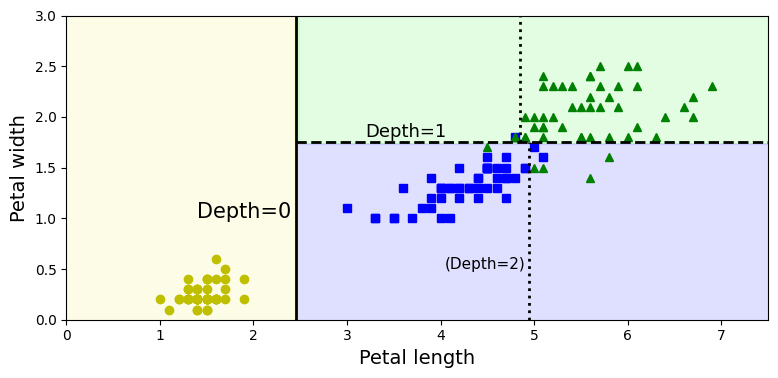

In [46]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(my_tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("my_decision_tree_decision_boundaries_plot")
plt.show()

As we can see, our implementation is very similar to the one in Scikit-Learn. The only difference is that we use the Gini impurity instead of the entropy.

<div class="alert alert-danger">

<b>WARNING: </b> Greedy algorithms 

<p>As you can see, the CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.</p>

<br>

Unfortunately, finding the optimal tree is known to be an [NP-Complete problem](https://en.wikipedia.org/wiki/NP-completeness), meaning that "the time required to solve the problem using any currently known algorithm increases rapidly as the size of the problem grows." It requires $O(exp(m))$ time, making the problem intractable even for fairly small training sets. This is why we must settle for a “reasonably good” solution.

</div>

## 1.6 Regularization

Decision Trees make very few assumptions about the training data (as opposed to linear models, which obviously assume that the data is linear, for example). If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, and most likely overfitting it. 

Such a model is often called a **non-parametric** model, not because it does not have any parameters (it often has a lot), but because the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data. 

In contrast, a **parametric model** such as a linear model has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).

To avoid **overfitting** the training data, you need to restrict the Decision Tree’s freedom during training.

As you know by now, this is called **regularization**:

- The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree. This is controlled by the **`max_depth`** hyperparameter (which defaults to None, meaning unlimited). Reducing **`max_depth`** will regularize the model and thus reduce the risk of overfitting. 

- **Pruning** is another way to regularize a Decision Tree: you first train the tree without any restrictions, then you remove the least important nodes. A node's importance is measured by the **`impurity`** it induces in its children. This is called **cost-complexity pruning**. To do this, you need to set the **`ccp_alpha`** hyperparameter to a value greater than 0.0. This will make the algorithm prune the tree once it has finished training. The higher the **`ccp_alpha`** value, the more nodes will be pruned.

We are going to focus in the **`max_depth`** hyperparameter to regularize our Decision Tree. Let's train a Decision Tree on the moons dataset:

The **`DecisionTreeClassifier`** class has a few other parameters that similarly restrict the shape of the Decision Tree: 

- **`min_samples_split`** (the minimum number of samples a node must have before it can be split)
- **`min_samples_leaf`** (the minimum number of samples a leaf node must have)
- **`min_weight_fraction_leaf`** (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances)
- **`max_leaf_nodes`** (maximum number of leaf nodes)
- **`max_features`** (maximum number of features that are evaluated for splitting at each node). 

Increasing **`min_*`** hyperparameters or reducing **`max_*`** hyperparameters will regularize the model.

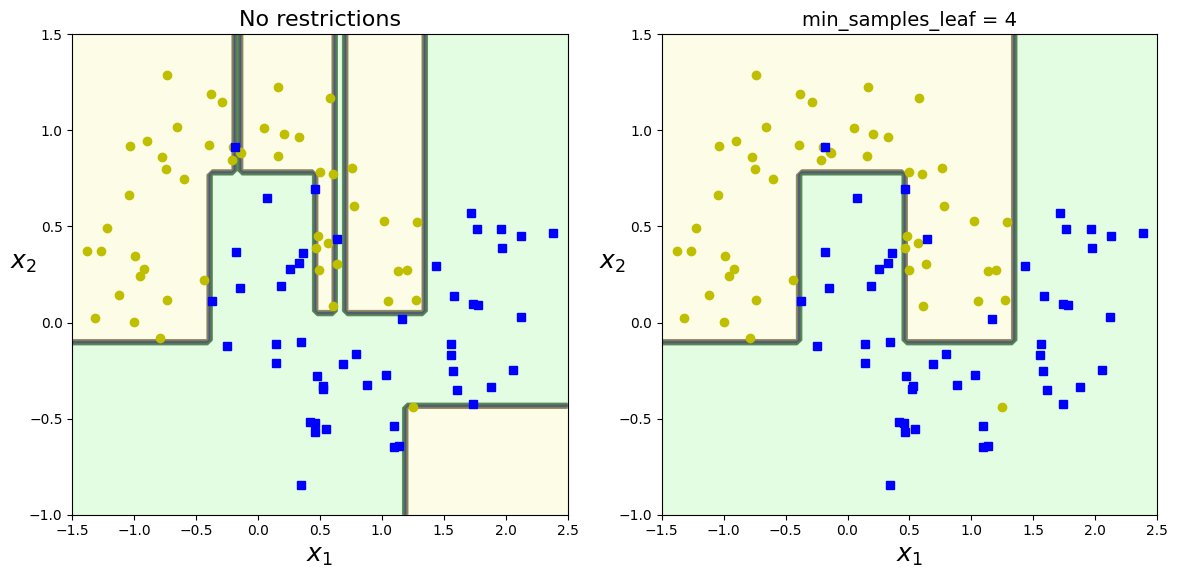

In [47]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

<div class="image">
     <img src="./figures/decision_trees/min_samples_leaf_plot.png" width="100%"  align="right">
</div>

Above we have trained two Decision Trees trained on the **toy** moons dataset(http://scikit-learn.org/stable/datasets/index.html#sample-generators). 

On the left, the Decision Tree is trained with the default hyperparameters (i.e., no restrictions), and on the right the Decision Tree is trained with **`min_samples_leaf=4`**. 

It is quite obvious that the model on the left is overfitting, and the model on the right will probably generalize better.

<div class="alert alert-warning">
<b>EXERCISE 1:</b> Toy Data

Have a look at the [toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) included in **`scikit-learn`**. These datasets are useful to quickly illustrate the behavior of the various algorithms implemented in the scikit.

<br>

They are however often too small to be representative of real world machine learning tasks.

<br>

You should always be thinking about what toy/dummy dataset you could use to get started on the particular problem you are working on.

<br>

Use **`matplotlib`** to visualize two datasets included in **`scikit-learn`** and think about what would make them easy/hard for a particular class of algorithm.

</div>

<div class="alert alert-warning">
<b>EXERCISE 2:</b> Toy Data for Decision Trees classification

After you checked some the [toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) included in **`scikit-learn`**, train your own Decision Tree classifier on one of them using the **`DecisionTreeClassifier`** class from **`scikit-learn`**.
After training the model, visualize the decision boundaries and the decision tree using the libraries we have seen in this notebook.

</div>

## 1.7 Regression

Decision Trees are also capable of performing regression tasks. 

Let’s build a regression tree using **`scikit-learn`**’s **`DecisionTreeRegressor`** class, training it on a noisy quadratic dataset with **`max_depth=2`**

In [48]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

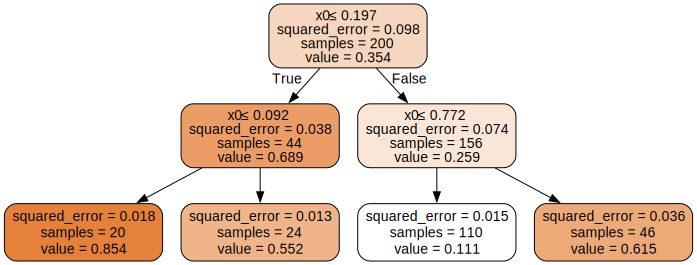

In [49]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_reg, out_file=None, 
                         filled=True, rounded=True, 
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

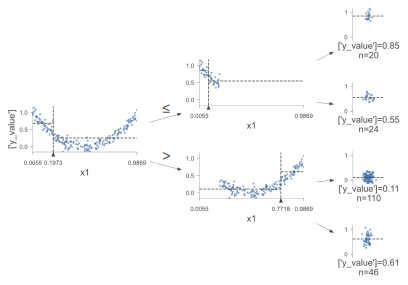

In [50]:
import dtreeviz
from dtreeviz.trees import *

viz_model = dtreeviz.model(tree_reg, 
               X_train=X, #X
               y_train=y, #Y
               target_name=['y_value'], #Name of Y variable
               feature_names=['x1', 'x2'], #Name of variables in X
              ) 
               
viz_model.view(orientation='LR')

This tree looks very similar to the classification tree we built earlier. The main difference is that instead of predicting a class in each node, it predicts a value. 

For example, suppose you want to make a prediction for a new instance with $x_0 = 0.6$. You traverse the tree starting at the root, and you eventually reach the leaf node that predicts **`value=0.111`**. 

This prediction is simply the average target value of the 110 training instances associated to this leaf node. 

This prediction results in a Mean Squared Error (MSE) equal to 0.015 over these 110 instances.

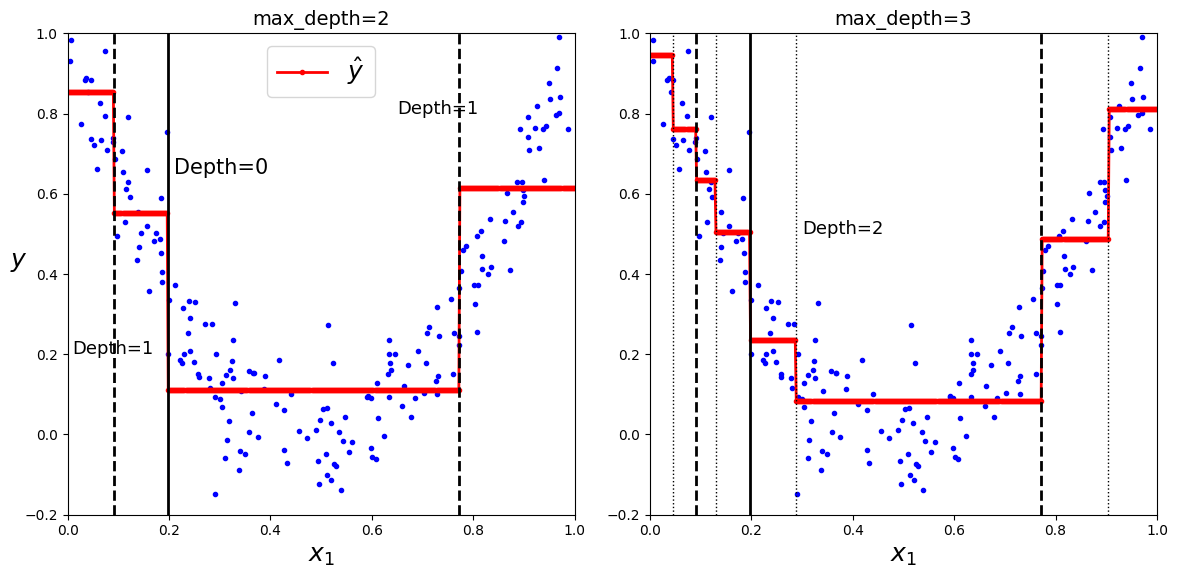

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(12, 6));
plt.subplot(121);
plot_regression_predictions(tree_reg1, X, y);
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2);
plt.text(0.21, 0.65, "Depth=0", fontsize=15);
plt.text(0.01, 0.2, "Depth=1", fontsize=13);
plt.text(0.65, 0.8, "Depth=1", fontsize=13);
plt.legend(loc="upper center", fontsize=18);
plt.title("max_depth=2", fontsize=14);

plt.subplot(122);
plot_regression_predictions(tree_reg2, X, y, ylabel=None);
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2);
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1);
plt.text(0.3, 0.5, "Depth=2", fontsize=13);
plt.title("max_depth=3", fontsize=14);

save_fig("tree_regression_plot");
plt.show();

<div class="image">
     <img src="./figures/decision_trees/tree_regression_plot.png" width="100%"  align="right">
</div>

This model’s predictions are represented on the left of Figure. If you set **`max_depth=3`**, you get the predictions represented on the right. 

Notice how the predicted value for each region is always the average target value of the instances in that region. The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.

The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the Mean Square Error (MSE). This is the cost function for regression:

$$ J(k,t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right} $$ 

where:
- $J(k,t_k)$ is the impurity of the subset using feature $k$ and threshold $t_k$
- $MSE_{l}$ is the mean squared error of the left subset
- $MSE_{r}$ is the mean squared error of the right subset
- $m_l$ is the number of instances in the left subset
- $m_r$ is the number of instances in the right subset 
- $m$ is the total number of instances in the subset

Here $MSE_{node}$ is the mean squared error of the $node$:

$$ MSE_{node} = \sum_{i=1}^{n} (y^{(i)} - \hat{y}_{node})^2 $$

where:
- $n$ is the number of instances in the node
- $y^{(i)}$ is the target value of the $i^{th}$ instance
- $\hat{y}_{node}$ is the mean target value of the instances in the node

and $\hat{y}_{node}$ is the mean target value of the instances in the node:

$$ \hat{y}_{node} = \frac{1}{m_{node}} \sum_{i=1}^{m_{node}} y^{(i)} $$

where:
- $m_{node}$ is the number of instances in the node
- $y^{(i)}$ is the target value of the $i^{th}$ instance

Just like for classification tasks, Decision Trees are prone to overfitting when dealing with regression tasks.

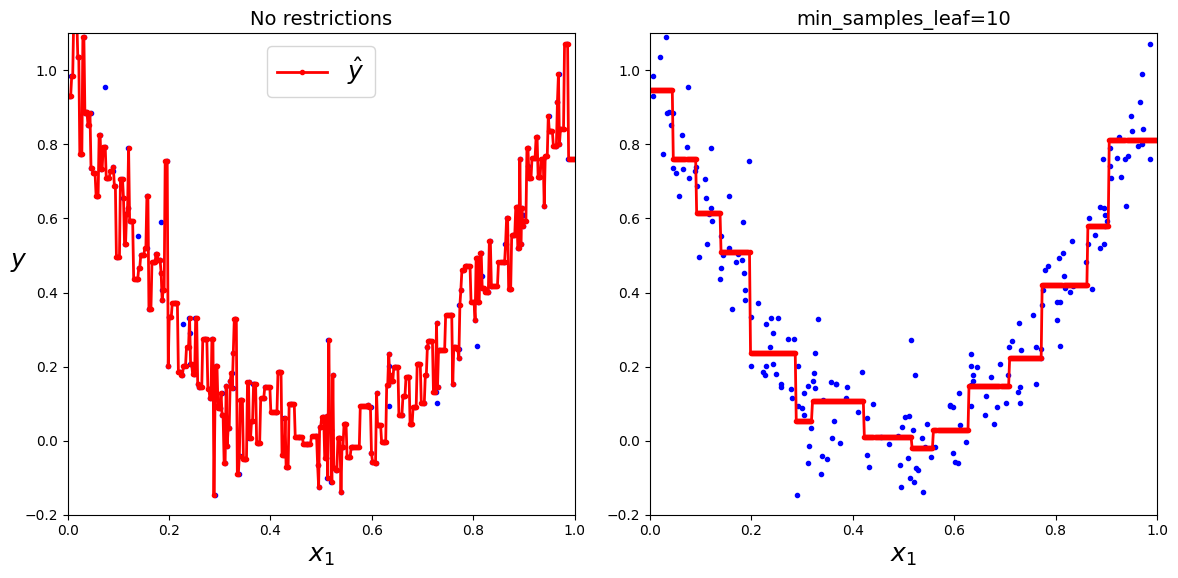

In [52]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(12, 6));

plt.subplot(121);
plt.plot(X, y, "b.");
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$");
plt.axis([0, 1, -0.2, 1.1]);
plt.xlabel("$x_1$", fontsize=18);
plt.ylabel("$y$", fontsize=18, rotation=0);
plt.legend(loc="upper center", fontsize=18);
plt.title("No restrictions", fontsize=14);

plt.subplot(122);
plt.plot(X, y, "b.");
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$");
plt.axis([0, 1, -0.2, 1.1]);
plt.xlabel("$x_1$", fontsize=18);
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14);

save_fig("tree_regression_regularization_plot");
plt.show();

<div class="image">
     <img src="./figures/decision_trees/tree_regression_regularization_plot.png" width="100%"  align="right">
</div>

Without any regularization (i.e., using the default hyperparameters), you get the predictions on the left.

It is obviously overfitting the training set very badly. Just setting **`min_samples_leaf=10`** results in a much more reasonable model, represented on the right.

<div class="alert alert-warning">
<b>EXERCISE 3:</b> Training on Toy Data

<p> Train and fine-tune a Decision Tree for the moons dataset:</p>

<br>

- Generate a moons dataset using **`make_moons(n_samples=10000, noise=0.4)`**.

- Split it into a training set and a test set using **`train_test_split()`**.

- Use grid search with cross-validation (with the help of the **`GridSearchCV`** class) to find good hyperparameter values for a **`DecisionTreeClassifier`**. Hint: try various values for **`max_leaf_nodes`**.

- Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

</div>

<div class="alert alert-warning">
<b>EXERCISE 4:</b> Implementation of CART for Regression

Using the code for the Decision Tree classifier, implement the CART algorithm for regression by updating the code in order that it uses the MSE cost function.

</div>

<div class="alert alert-warning">
<b>EXERCISE 5:</b> Decision Tree regression on Toy Data

Now that you know some [toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) included in **`scikit-learn`**, train your own Decision Tree regressor on one of them using the **`DecisionTreeRegressor`** class from **`scikit-learn`**.
After training the model, visualize the decision boundaries and the decision tree using the libraries we have seen in this notebook and explain the results.

</div>

## Instability 

Hopefully by now you are convinced that Decision Trees have a lot going for them. They are:
- simple to understand and interpret
- easy to use
- versatile
- powerful. 



However they do have a few limitations.

- Orthogonal decision boundaries (all splits are perpendicular to an axis)
- Very sensitive to small variations in the training data

Random Forests can limit this instability by averaging predictions over many trees, and we'll look at this next.



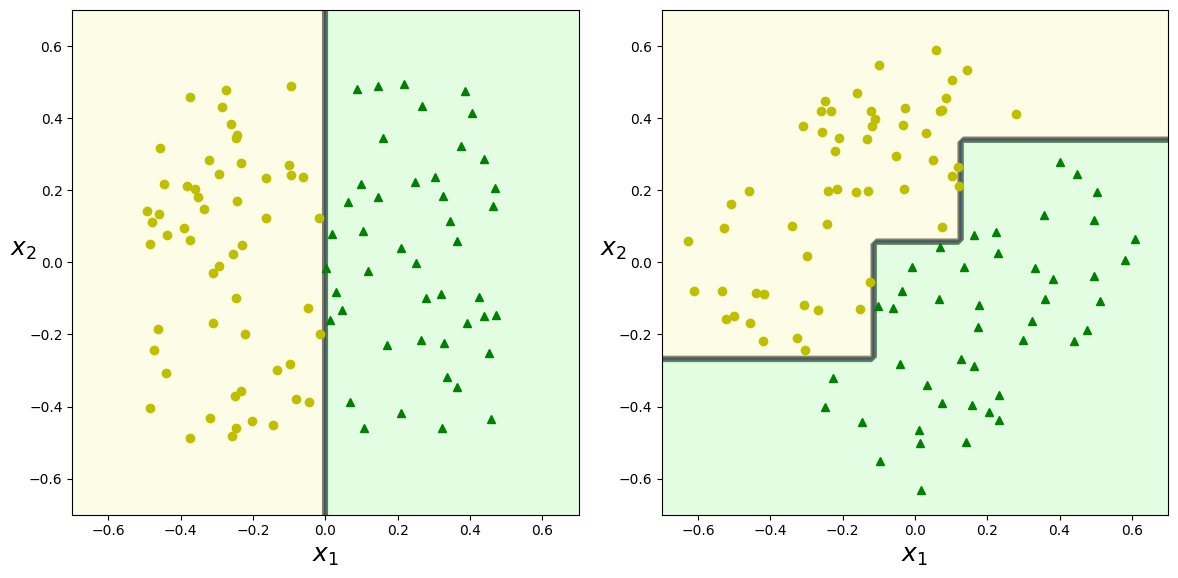

In [53]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

save_fig("sensitivity_to_rotation_plot")
plt.show()

<div class="image">
     <img src="./figures/decision_trees/sensitivity_to_rotation_plot.png" width="100%"  align="right">
</div>

The orthogonal decision boundaries (all splits are perpendicular to an axis) make the decision tree sensitive to training set rotation. As shown in the above figures, on the left, a Decision Tree can split it easily, while on the right, after the dataset is rotated by 45°, the decision boundary looks unnecessarily convoluted. Although both Decision Trees fit the training set perfectly, it is very likely that the model on the right will not generalize well.

In [55]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)


IndexError: index 1 is out of bounds for axis 1 with size 1

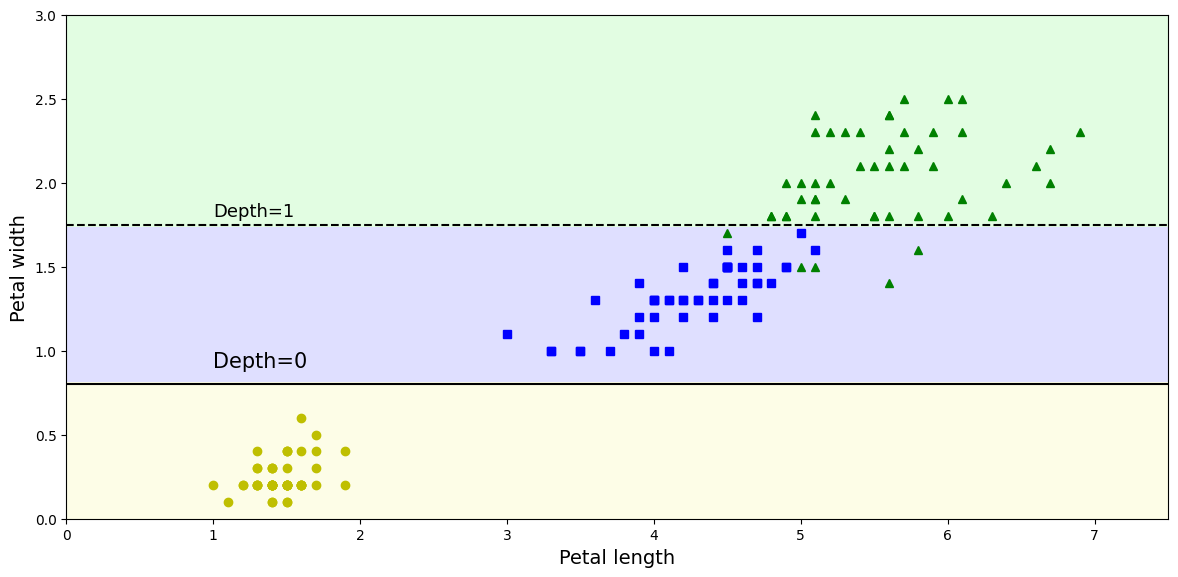

In [ ]:
plt.figure(figsize=(12, 6));
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False);
plt.plot([0, 7.5], [0.8, 0.8], "k-");
plt.plot([0, 7.5], [1.75, 1.75], "k--");
plt.text(1.0, 0.9, "Depth=0", fontsize=15);
plt.text(1.0, 1.80, "Depth=1", fontsize=13);

save_fig("decision_tree_instability_plot");
plt.show();

<div class="image">
     <img src="./figures/decision_trees/decision_tree_decision_boundaries_plot.png" width="100%"  align="right">
</div>

<div class="image">
     <img src="./figures/decision_trees/decision_tree_instability_plot.png" width="100%"  align="right">
</div>

If we just remove the widest Iris-Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide) and train a new Decision Tree, we may get the model represented in the above figure. As you can see, it looks very different from the previous Decision Tree. 

Also, we can rotate the iris dataset, we would get a different model as shown below.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

<Figure size 864x432 with 0 Axes>

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


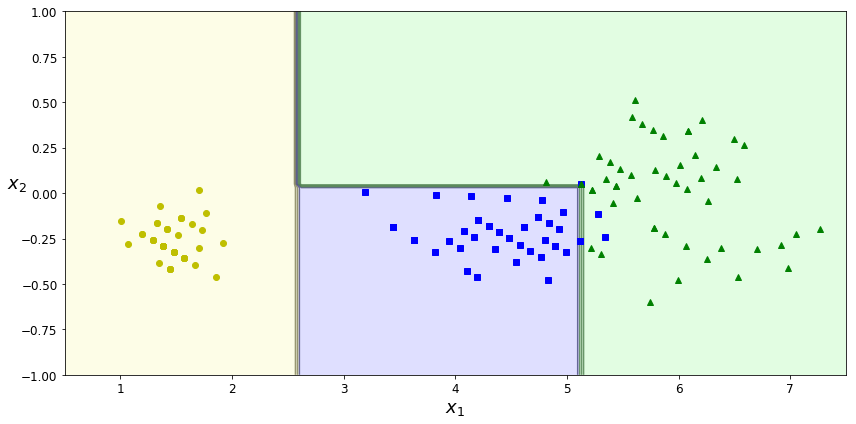

In [ ]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(12, 6))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

save_fig("training_data_rotation");

plt.show()

<div class="image">
     <img src="./figures/decision_trees/training_data_rotation.png" width="100%"  align="right">
</div>

# 2. Ensemble Learning

Suppose you ask a complex question to thousands of random people, then aggregate their answers. In many cases you will find that this aggregated answer is better than an expert’s answer. This is called the *wisdom of the crowd*.

Similarly, if you aggregate the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor. 

A group of predictors is called an **ensemble**; thus, this technique is called **Ensemble Learning**, and an ensemble Learning algorithm is called an **Ensemble method**.

For example, you can train a group of Decision Tree classifiers, each on a different random subset of the training set. 

To make predictions, you just obtain the predictions of all individual trees, then predict the class that gets the most votes. Such an ensemble of Decision Trees is called a **Random Forest**, and despite its simplicity, this is one of the most powerful ML algorithms available today.

Moreover, and we'll see this again later, you will often use Ensemble methods near the end of a project, once you have already built a few good predictors, to combine them into an even better predictor. 

In fact, the winning solutions in Machine Learning competitions often involve several Ensemble methods (most famously in the Netflix Prize competition).

## Ensemble Learning 

- Cross validation (model validation)
- Ensemble learning 
- Bootstrapping 
- Bagging (Bootstrag aggregation)
- Random Forests (Bagging + "perturbation")
- Boosting (Adaboost)
- Gradient boosting (XGBoost)
- Model complexity, selection and regularization 

## 2.1 Voting classifiers

Suppose you have trained a few classifiers, each one achieving about 80% accuracy. You may have a Logistic Regression classifier, an SVM classifier, a Random Forest classifier, a K-Nearest Neighbors classifier, and perhaps a few more:

<div class="image">
     <img src="./figures/ensembles/mlst_0701.png" width="100%"  align="right">
</div>

A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. 

This majority-vote classifier is called a **hard voting** classifier.

<div class="image">
     <img src="./figures/ensembles/mlst_0702.png" width="100%"  align="right">
</div>

Each classifier is a **weak learner** (meaning it does only slightly better than random guessing), the ensemble can still be a **strong learner** (achieving high accuracy), provided there are a sufficient number of weak learners and they are sufficiently diverse.

### Law of large numbers 

How is this possible? The following analogy can help shed some light on this mystery. 

Suppose you have a slightly biased coin that has a 51% chance of coming up heads, and 49% chance of coming up tails. If you toss it 1,000 times, you will generally get more or less 510 heads and 490 tails, and hence a majority of heads. 

If you do the math, you will find that the probability of obtaining a majority of heads after 1,000 tosses is close to 75%. The more you toss the coin, the higher the probability (e.g., with 10,000 tosses, the probability climbs over 97%). 

This is due to the **law of large numbers**: as you keep tossing the coin, the ratio of heads gets closer and closer to the probability of heads (51%). 

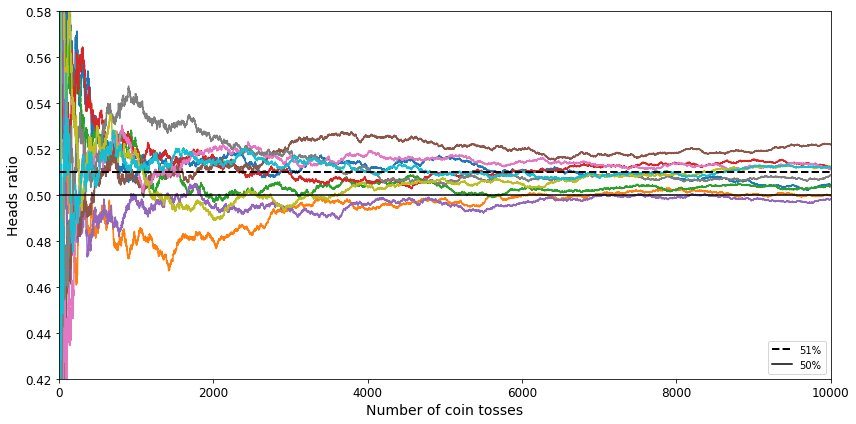

In [ ]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(12,6));
plt.plot(cumulative_heads_ratio);
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%");
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%");
plt.xlabel("Number of coin tosses");
plt.ylabel("Heads ratio");
plt.legend(loc="lower right");
plt.axis([0, 10000, 0.42, 0.58]);
save_fig("law_of_large_numbers_plot");
plt.show();

<div class="image">
     <img src="./figures/ensembles/law_of_large_numbers_plot.png" width="100%"  align="right">
</div>

Similarly, suppose you build an ensemble containing 1,000 classifiers that are individually correct only 51% of the time (barely better than random guessing). 

If you predict the majority voted class, you can hope for up to 75% accuracy! 

However, this is only true if all classifiers are perfectly **independent**, making uncorrelated errors, which is clearly not the case since they are trained on the same data. 

They are likely to make the same types of errors, so there will be many majority votes for the wrong class, reducing the ensemble’s accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train);
    y_pred = clf.predict(X_test);
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


As we can see the accuracy scores of different models, the voting classifier slightly outperforms all the individual classifiers. 

Also, if all classifiers are able to estimate class probabilities (i.e., they have a **`predict_proba()`** method), then you can tell **`scikit-learn`** to predict the class with the highest class probability, averaged over all the individual classifiers. 

This is called **soft voting**.

In [ ]:
%%capture

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train);
    y_pred = clf.predict(X_test);
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred));

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


We can see that the voting classifier with soft voting achieves over 91% accuracy. In fact, **soft voting** often achieves higher performance than hard voting because it gives more weight to highly confident votes. 

All you need to do is replace voting="hard" with voting="soft" and ensure that all classifiers can estimate class probabilities. This is not the case of the SVC class by default, so you need to set its probability hyperparameter to True (this will make the SVC class use cross-validation to estimate class probabilities, slowing down training, and it will add a predict_proba() method).

## 2.2 Bagging and Pasting

One way to get a diverse set of classifiers is to use very different training algorithms, as just discussed. 

Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set. 

When sampling is performed with replacement, this method is called **bagging** (short for bootstrap aggregating).

When sampling is performed without replacement, it is called **pasting**.

This sampling and training process is represented in the figure below.

<div class="image">
     <img src="./figures/ensembles/mlst_0704.png" width="100%"  align="right">
</div>

Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. 

The aggregation function is typically the statistical **mode** (i.e., the most frequent prediction, just like a hard voting classifier) for classification, or the average for regression. 

Each individual predictor has a higher **bias** than if it were trained on the original training set, but aggregation reduces both **bias** and **variance**. More on the trade-off [here](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.

**`scikit-learn`** offers a simple API for both bagging and pasting with the **`BaggingClassifier`** class (or **`BaggingRegressor`** for regression). 

The following code trains an ensemble of 500 Decision Tree classifiers, each trained on 100 training instances randomly sampled from the training set with replacement (this is an example of bagging, but if you want to use pasting instead, just set **`bootstrap=False`**). 

The **`n_jobs`** parameter tells **`scikit-learn`** the number of CPU cores to use for training and predictions (**`–1`** tells **`scikit-learn`** to use all available cores):

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.904


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


We can find that the accuracy score increases from 0.856 with a single decision tree to 0.904 with a bagging ensemble of 500 trees. Also, we can compare the decision boundaries between the two method.

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

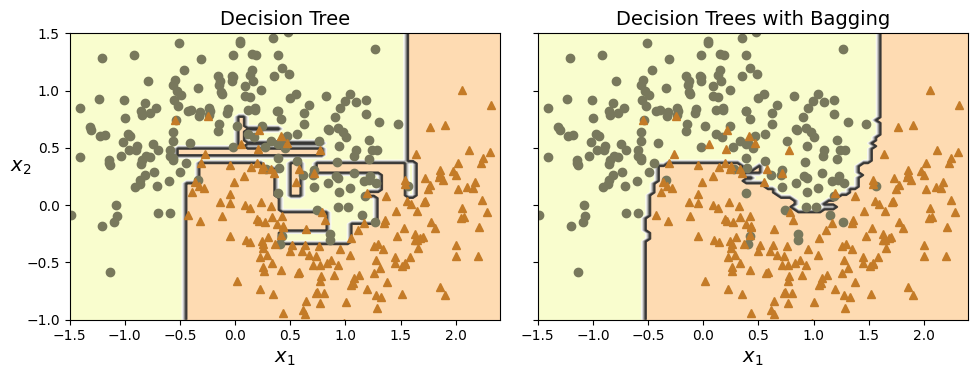

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

<div class="image">
     <img src="./figures/ensembles/decision_tree_without_and_with_bagging_plot.png" width="100%"  align="right">
</div>

As we can see, the ensemble’s predictions will likely generalize much better than the single Decision Tree’s predictions: the ensemble has a comparable bias but a smaller variance (it makes roughly the same number of errors on the training set, but the decision boundary is less irregular).

<div class="alert alert-info">
<b>HINT:</b>  Soft voting 

The **`BaggingClassifier`** automatically performs soft voting instead of hard voting if the base classifier can estimate class probabilities (i.e., if it has a **`predict_proba()`** method), which is the case with Decision Trees classifiers.

</div>

## 2.3 Out-of-Bag Evaluation

With **bagging**, some instances may be sampled several times for any given predictor, while others may not be sampled at all. 

By default a **`BaggingClassifier`** samples $m$ training instances with replacement (**`bootstrap=True`**), where $m$ is the size of the training set. 

This means that only about 63% of the training instances are sampled on average for each predictor. The remaining 37% of the training instances that are not sampled are called out-of-bag (oob) instances. Note that they are not the same 37% for all predictors.


Since a predictor never sees the **oob** instances during training, it can be evaluated on these instances, without the need for a separate validation set or cross-validation. 

You can evaluate the ensemble itself by averaging out the **oob** evaluations of each predictor.

In **`scikit-learn`**, you can set **`oob_score=True`** when creating a **`BaggingClassifier`** to request an automatic **oob** evaluation after training. 

The following code demonstrates this. The resulting evaluation score is available through the **`oob_score_`** variable:

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=40, verbose=0, warm_start=False)

0.9013333333333333

0.912

The **oob** decision function for each training instance is also available through the **`oob_decision_function_`** variable. 

In this case (since the base estimator has a **`predict_proba()`** method) the decision function returns the class probabilities for each training instance. 

For example, the **oob** evaluation estimates that the first training instance has a 68.25% probability of belonging to the positive class (and 31.75% of belonging to the negative class):

In [ ]:
bag_clf.oob_decision_function_

array([[0.31746032, 0.68253968],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08379888, 0.91620112],
       [0.31693989, 0.68306011],
       [0.02923977, 0.97076023],
       [0.97687861, 0.02312139],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.71195652, 0.28804348],
       [0.83957219, 0.16042781],
       [0.97777778, 0.02222222],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97297297, 0.02702703],
       [0.95238095, 0.04761905],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.38947368, 0.61052632],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.96685083, 0.03314917],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64804469, 0.35195531],
       [0.

### Random Patches and Random Subspaces

The **`BaggingClassifier`** class supports sampling the features as well. This is controlled by two hyperparameters: **`max_features`** and **`bootstrap_features`**. 

They work the same way as **`max_samples`** and **`bootstrap`**, but for feature sampling instead of instance sampling. Thus, each predictor will be trained on a random subset of the input features.

This is particularly useful when you are dealing with high-dimensional inputs. Sampling both training instances and features is called the **Random Patches** method. Keeping all training instances (i.e., **`bootstrap=False`** and **`max_samples=1.0`**) but sampling features (i.e., **`bootstrap_features=True`** and/or **`max_features smaller than 1.0`**) is called the **Random Subspaces** method.

Sampling features results in even more predictor diversity, trading a bit more bias for a lower variance.

## 2.4 Random Forests

As we have discussed, a **Random Forest** is an ensemble of Decision Trees, generally trained via the bagging method, typically with **`max_samples`** set to the size of the training set. 

Instead of building a **`BaggingClassifier`** and passing it a **`DecisionTreeClassifier`**, you can instead use the **`RandomForestClassifier`** class, which is more convenient and optimized for Decision Trees (similarly, there is a **`RandomForestRegressor`** class for regression tasks).

The following code trains a Random Forest classifier with 500 trees (each limited to maximum 16 nodes), using all available CPU cores:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

The **Random Forest** algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. The following BaggingClassifier is roughly equivalent to the previous RandomForestClassifier:

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

When you are growing a tree in a **Random Forest**, at each node only a random subset of the features is considered for splitting (as discussed earlier). 

It is possible to make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds (like regular Decision Trees do).

A forest of such extremely random trees is simply called an **Extremely Randomized Trees** ensemble (or **Extra-Trees** for short). Once again, this trades more bias for a lower variance. 

It also makes **Extra-Trees** much faster to train than regular Random Forests since finding the best possible threshold for each feature at every node is one of the most time-consuming tasks of growing a tree.

<div class="alert alert-info">
<b>HINT:</b> Extra-Trees

It is hard to tell in advance whether a **`RandomForestClassifier`** will perform better or worse than an **`ExtraTreesClassifier`**. Generally, the only way to know is to try both and compare them using cross-validation (and tuning the hyperparameters using grid search).

</div>

## Feature importance 

Yet another great quality of **Random Forests** is that they make it easy to measure the relative importance of each feature. 

**`scikit-learn`** measures a feature’s importance by looking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). 

More precisely, it is a weighted average, where each node’s weight is equal to the number of training samples that are associated with it.

**`scikit-learn`** computes this score automatically for each feature after training, then it scales the results so that the sum of all importances is equal to 1. You can access the result using the feature_importances_ variable. For example, the following code trains a RandomForestClassifier on the iris dataset and outputs each feature’s importance. It seems that the most important features are the petal length (44%) and width (42%), while sepal length and width are rather unimportant in comparison (10% and 2%, respectively).


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

sepal length (cm) 0.10289959415003253
sepal width (cm) 0.025505952927341282
petal length (cm) 0.4450701737207191
petal width (cm) 0.4265242792019075


<div class="alert alert-warning">
<b>EXERCISE 6:</b> Ensemble Learning practice

Use your prefer dataset from the [toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) included in **`scikit-learn`** to train an ensemble learning of your choice, such as Random Forest or combining several models using voting classifiers or bagging and pasting.

</div>



<div class="alert alert-info">
<b>HINT:</b>  Exploratory analysis of features/variable 

<p>Random Forests are very handy to get a quick understanding of what features actually matter, in particular if you need to perform feature selection.. </p>

</div>

# 3. Boosting

**Boosting** (originally called *hypothesis boosting*) refers to any ensemble method that can combine several weak learners into a strong learner. 

The general idea of most **boosting** methods is to train predictors sequentially, each trying to correct its predecessor. 

There are many boosting methods available, but by far the most popular are **AdaBoost** (short for *Adaptive Boosting*) and **Gradient Boosting**. 


## 3.1 AdaBoost

One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. This is the technique used by **AdaBoost**.

For example, to build an AdaBoost classifier, a first base classifier (such as a Decision Tree) is trained and used to make predictions on the training set. The relative weight of misclassified training instances is then increased. A second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on...

<div class="image">
     <img src="./figures/ensembles/mlst_0707.png" width="100%"  align="right">
</div>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

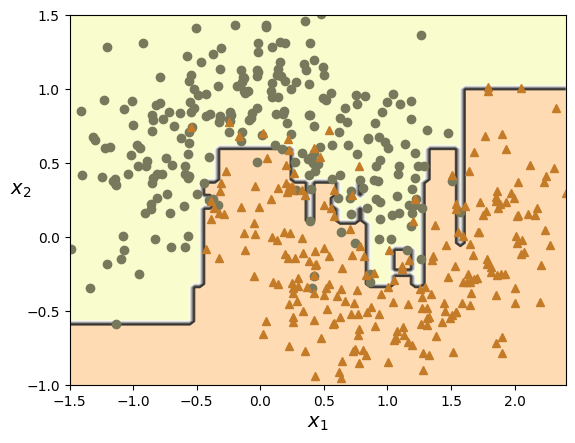

In [ ]:
plot_decision_boundary(ada_clf, X, y)

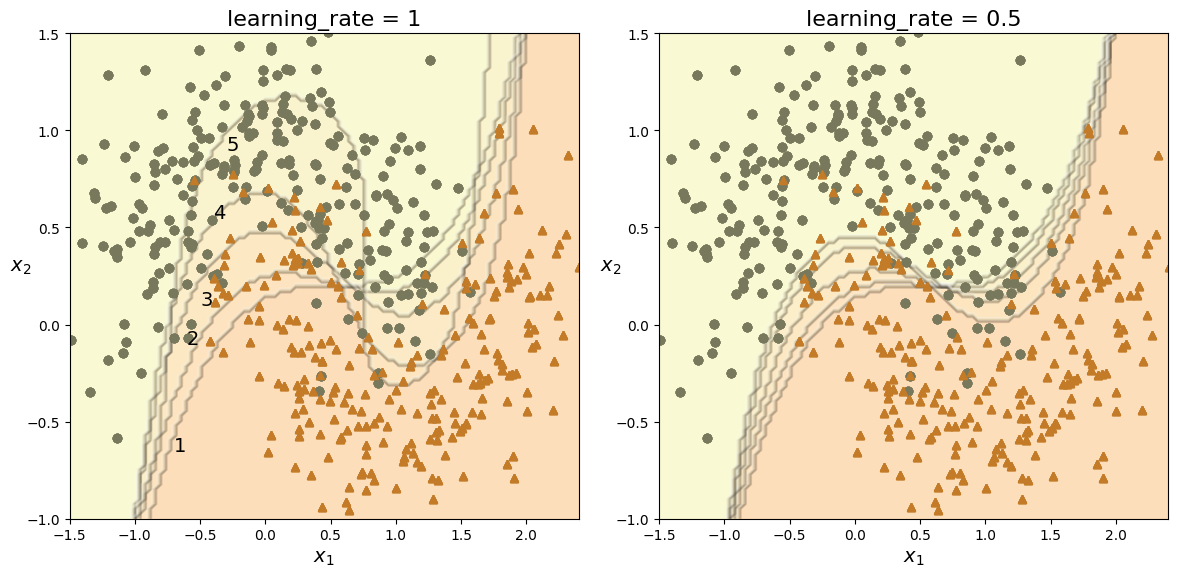

In [ ]:
m = len(X_train)

plt.figure(figsize=(12, 6))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    for i in range(5):
        plt.subplot(subplot)
        svm_clf = SVC(kernel="rbf", C=0.05, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)

plt.subplot(121);
plt.text(-0.7, -0.65, "1", fontsize=14);
plt.text(-0.6, -0.10, "2", fontsize=14);
plt.text(-0.5,  0.10, "3", fontsize=14);
plt.text(-0.4,  0.55, "4", fontsize=14);
plt.text(-0.3,  0.90, "5", fontsize=14);
save_fig("boosting_plot");
plt.show();

Lets look at decision boundaries of five consecutive predictors on the moons dataset (in this example, each predictor is a highly regularized SVM classifier with an RBF kernel). 

The first classifier gets many instances wrong, so their weights get boosted. The second classifier therefore does a better job on these instances, and so on. 

The plot (below) on the right represents the same sequence of predictors except that the learning rate is halved (i.e., the misclassified instance weights are boosted half as much at every iteration). 



<div class="image">
     <img src="./figures/ensembles/boosting_plot.png" width="100%"  align="right">
</div>

Once all predictors are trained, the ensemble makes predictions very much like **bagging**, except that predictors have different weights depending on their overall accuracy on the weighted training set.

## 3.2 Gradient Boosting

Another very popular Boosting algorithm is **Gradient Boosting**.

Just like **AdaBoost**, **Gradient Boosting** works by sequentially adding predictors to an ensemble, each one correcting its predecessor. 

However, instead of tweaking the instance weights at every iteration like **AdaBoost** does, this method tries to fit the new predictor to the residual errors made by the previous predictor.


Let’s go through a simple regression example using Decision Trees as the base predictors (Gradient Boosting also works great with classificatino tasks). 

This is called Gradient Tree Boosting, or **Gradient Boosted Regression Trees** (GBRT). 

To start, we will fit a **`DecisionTreeRegressor`** to the training set (for example, a noisy quadratic training set):

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Now train a second **`DecisionTreeRegressor`** on the residual errors made by the first predictor:

In [ ]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

Then we train a third regressor on the residual errors made by the second predictor:

In [ ]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

Now we have an ensemble containing three trees. 

It can make predictions on a new instance simply by adding up the predictions of all the trees:

In [ ]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

In [ ]:
%%capture

def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(12,12));

plt.subplot(321);
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

save_fig("gradient_boosting_plot")
plt.show()

<div class="image">
     <img src="./figures/ensembles/gradient_boosting_plot.png" width="100%"  align="right">
</div>

The figure above represents the predictions of these three trees in the left column, and the ensemble’s predictions in the right column. 

In the first row, the ensemble has just one tree, so its predictions are exactly the same as the first tree’s predictions. 

In the second row, a new tree is trained on the residual errors of the first tree. On the right you can see that the ensemble’s predictions are equal to the sum of the predictions of the first two trees. 

Similarly, in the third row another tree is trained on the residual errors of the second tree. You can see that the ensemble’s predictions gradually get better as trees are added to the ensemble.

A simpler way to train **GBRT** ensembles is to use **`scikit-learn`**’s **`GradientBoostingRegressor`** class.

Much like the **`RandomForestRegressor`** class, it has hyperparameters to control the growth of Decision Trees (e.g., **`max_depth`**, **`min_samples_leaf`**, and so on), as well as hyperparameters to control the ensemble training, such as the number of trees (**`n_estimators`**). 

The following code creates the same ensemble as the previous one:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

The **`learning_rate`** hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.1, you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better. 

This is a regularization technique called **shrinkage**. The figure below shows two GBRT ensembles trained with a low learning rate: the one on the left does not have enough trees to fit the training set, while the one on the right has too many trees and overfits the training set.

In [ ]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [ ]:
%%capture 

plt.figure(figsize=(12,6))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

save_fig("gbrt_learning_rate_plot")
plt.show()

<div class="image">
     <img src="./figures/ensembles/gbrt_learning_rate_plot.png" width="100%"  align="right">
</div>

In order to find the optimal number of trees, you can use **early stopping**. 

A simple way to implement this is to use the **`staged_predict()`** method: it returns an iterator over the predictions made by the ensemble at each stage of training (with one tree, two trees, etc.). 

The following code trains a GBRT ensemble with 120 trees, then measures the validation error at each stage of training to find the optimal number of trees, and finally trains another GBRT ensemble using the optimal number of trees:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=55, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [ ]:
min_error = np.min(errors)

In [ ]:
%%capture

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)

save_fig("early_stopping_gbrt_plot")
plt.show()

<div class="image">
     <img src="./figures/ensembles/early_stopping_gbrt_plot.png" width="100%"  align="right">
</div>

<div class="alert alert-warning">
<b>EXERCISE 7:</b> Boosting practice

Use your prefer dataset from the [toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) included in **`scikit-learn`** to train a boosting ensemble of your choice, such as AdaBoost or Gradient Boosting.

</div>

# 4. Stacking

**stacking** (short for stacked generalization) is a machine learning technique that uses a meta-model to learn how to best combine the predictions from two or more base models. Stacking does training through:
- The base models are trained on the same training dataset, but different subsets of features
- The meta-model is trained on the predictions of the base models and the original features.

It is based on a simple idea: **instead of using trivial functions (such as hard voting) to aggregate the predictions of all predictors in an ensemble, why don’t we train a model to perform this aggregation?**

The figure below shows such an ensemble performing a regression task on a new instance.

<img src="./figures/ensembles/mls3_0711.png" width="80%">

Each of the bottom three predictors predicts a different value (3.1, 2.7, and 2.9), and then the final predictor (called a **blender**, or a **meta learner**) takes these predictions as inputs and makes the final prediction (3.0).

To train the blender, you first need to build the blending training set:
- Use `cross_val_predict()` on every predictor in the ensemble to get out-of-sample predictions for each instance in the original training set. In Scikit-learn's implementation of stacking, the meta learner is trained through cross-validation
- Ceate a new training set with the *out-of-sample predictions* as inputs and the original target values as outputs. 

The figure below shows this process:

<img src="./figures/ensembles/mls3_0712.png" width="80%">

It is actually possible to train several different blenders this way (e.g., one using linear regression, another using random forest regression) to get a whole layer of blenders, and then add another blender on top of that to produce the final prediction:

<img src="./figures/ensembles/mls3_0713.png" width="80%">

It is actually possible to train several different blenders this way (e.g., one using Linear Regression, another using Random Forest Regression, and so on): we get a whole layer of blenders. 

One way to do this is by splitting the training set into three subsets: 
- the first one is used to train the first layer
- the second one is used to create the training set used to train the second layer (using predictions made by the predictors of the first layer)
- the third one is used to create the training set to train the third layer (using predictions made by the predictors of the second layer). 

**However, the above is feasible with a large dataset. The algorithm implementation of stacking by Scikit-learn rather uses the whole dataset.**

Once this is done, we can make a prediction for a new instance by going through each layer sequentially.

Scikit-Learn provides two classes for stacking ensembles:
- `StackingClassifier` for classification
- `StackingRegressor` for regression

And their implementation for stacking is that:

> "During training:
> - the estimators are fitted on the whole training data X_train. They will be used when calling predict or predict_proba. 
> - To generalize and avoid over-fitting, the final_estimator is trained on out-samples using [sklearn.model_selection.cross_val_predict internally](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict)." - [Scikit-learn's documentation](https://scikit-learn.org/stable/modules/ensemble.html#stacking)

Here, the meta learner should **not use predictions from the base learners on their own training set** because it could end up just copying the most-overfit base learner. Then, by using cross-validation folds, each base estimator get's trained in different versions of the training set. The final meta-learner is trained over the whole training dataset

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5  # number of cross-validation folds
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

For each predictor, the stacking classifier will call `predict_proba()` if available; if not it will fall back to `decision_function()` or, as a last resort, call `predict()`. If you don’t provide a final estimator, StackingClassifier will use `LogisticRegression` and `StackingRegressor` will use `RidgeCV`

In [ ]:
stacking_clf.score(X_test, y_test)

0.888

Let's look at an example of doing Multi-layer Stacking:

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Create Learners per layer
layer_one_estimators = [
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ]

layer_two_estimators = [
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ]

layer_two = StackingClassifier(estimators=layer_two_estimators, 
                               final_estimator=RandomForestClassifier(random_state=43))

# Create Final model by 
stacking_clf = StackingClassifier(
    estimators=layer_one_estimators,
    final_estimator=layer_two,
    cv=5  # number of cross-validation folds
)
                               
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=StackingClassifier(estimators=[('lr',
                                                                   LogisticRegression(random_state=42)),
                                                                  ('rf',
                                                                   RandomForestClassifier(random_state=42)),
                                                                  ('svc',
                                                                   SVC(probability=True,
                                                                       random_state=42))],
                                                      final_estimator=RandomForestClassifier(random_state=43)))

As you can see, the `layer_one_estimators` become the base layers. Then, the final `final_estimator` in `stacking_clf` is the `layer_two`, which receives the inputs from `layer_one_estimators`. This means that we are replacing the meta learner with another layer of base learners

In [ ]:
stacking_clf.score(X_test, y_test)

0.896

Let's try adding another layer to our stacking:

In [ ]:
# Create Learners per layer
layer_one_estimators = [
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ]

layer_two_estimators = [
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ]

layer_three_estimators = [
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ]

layer_two = StackingClassifier(estimators=layer_two_estimators, 
                               final_estimator=layer_three)

layer_three = StackingClassifier(estimators=layer_three_estimators, 
                               final_estimator=RandomForestClassifier(random_state=43))

# Create Final model by 
stacking_clf = StackingClassifier(
    estimators=layer_one_estimators,
    final_estimator=layer_two,
    cv=5  # number of cross-validation folds
)
                               
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=StackingClassifier(estimators=[('lr',
                                                                   LogisticRegression(random_state=42)),
                                                                  ('rf',
                                                                   RandomForestClassifier(random_state=42)),
                                                                  ('svc',
                                                                   SVC(probability=True,
                                                                       random_state=42))],
                                                      final_estimator=StackingClassifier(estimators=[('lr',
                                                                                                      LogisticRegression(random_state=42)),
                                                                                                     ('rf',
                                                                                                      RandomForestClassifier(random_state=42)),
                                                                                                     ('svc',
                                                                                                      SVC(probability=True,
                                                                                                          random_state=42))],
                                                                                         final_estimator=RandomForestClassifier(random_state=43))))

In [ ]:
stacking_clf.score(X_test, y_test)

0.88

<div class="alert alert-warning">
<b>EXERCISE 8:</b> Stacking modeling practice

Now you are very familiar with the [toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) included in **`scikit-learn`**. For the last exercise, try combining several models in different layers using stacking. Mix and match different models and layers and see how it affects the performance of your model.

</div>

The performance of our second stacking classification model with the two layers is better than with one layer

## Further Reading 

- https://sebastianraschka.com/faq/docs/decision-tree-binary.html


- L. Breiman, J. Friedman, R. Olshen, and C. Stone. Classification and Regression Trees. Wadsworth, Belmont, CA, 1984.


- J.R. Quinlan. C4. 5: programs for machine learning. Morgan Kaufmann, 1993.


- T. Hastie, R. Tibshirani and J. Friedman. Elements of Statistical Learning, Springer, 2009.

## Credits

-  Geron, A. (2022) Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. Sebastopol: O’Reilly Media, Incorporated. [Access through UCL library.](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781098125967/)

- Geron, A. (2022) Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition), Chapter 6 [Git](https://github.com/ageron/handson-ml3/blob/main/06_decision_trees.ipynb)

- Geron, A. (2022) Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition), Chapter 7 [Git](https://github.com/ageron/handson-ml3/blob/main/07_ensemble_learning_and_random_forests.ipynb)

- Joachim Valente, CART decision trees, 2019, [Github](https://github.com/joachimvalente/decision-tree-cart/blob/master/cart.py)

- Google, Classification: ROC Curve and AUC, 2022, [Link](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)